#### Importing python libraries

In [1]:
import requests
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import os
import warnings
warnings.filterwarnings("ignore")

c:\Users\33760\anaconda3\envs\myenv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Obtenir le chemin du répertoire de travail actuel
current_directory = os.getcwd()

print(current_directory)

c:\Users\33760\Desktop\FULLSTACK\FULLSTACK\Projet\BLOC 5\Get around\notebooks


#### Get data : Delay Analysis

In [3]:
# Import dataset with pandas
df_delay = pd.read_excel(r'C:\Users\33760\Desktop\FULLSTACK\FULLSTACK\Projet\BLOC 5\Get around\data\get_around_delay_analysis.xlsx')
df_delay.head()

rental_id  car_id checkin_type     state  delay_at_checkout_in_minutes  \
0     505000  363965       mobile  canceled                           NaN   
1     507750  269550       mobile     ended                         -81.0   
2     508131  359049      connect     ended                          70.0   
3     508865  299063      connect  canceled                           NaN   
4     511440  313932       mobile     ended                           NaN   

   previous_ended_rental_id  time_delta_with_previous_rental_in_minutes  
0                       NaN                                         NaN  
1                       NaN                                         NaN  
2                       NaN                                         NaN  
3                       NaN                                         NaN  
4                       NaN                                         NaN

In [4]:
df_copy_eda = df_delay.copy()
df_copy_eda.shape

(21310, 7)

#### EDA : Delay Analysis

In [5]:
# Shape dataset
print('Number of data raws:', df_delay.shape[0])
print('Number of data colmuns:', df_delay.shape[1])

Number of data raws: 21310
Number of data colmuns: 7


In [6]:
# Display some information about dataset
df_delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21310 entries, 0 to 21309
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rental_id                                   21310 non-null  int64  
 1   car_id                                      21310 non-null  int64  
 2   checkin_type                                21310 non-null  object 
 3   state                                       21310 non-null  object 
 4   delay_at_checkout_in_minutes                16346 non-null  float64
 5   previous_ended_rental_id                    1841 non-null   float64
 6   time_delta_with_previous_rental_in_minutes  1841 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.1+ MB


###### 

In [7]:
# Analasis unique values
df_delay.nunique()

rental_id                                     21310
car_id                                         8143
checkin_type                                      2
state                                             2
delay_at_checkout_in_minutes                   1745
previous_ended_rental_id                       1788
time_delta_with_previous_rental_in_minutes       25
dtype: int64

Only two unique results for the column "checkin type": connect/mobile 

The "checkin_type": paper contract has not been taken into account in the data because it is too marginal

In [8]:
# Display some statistics about dataset
df_delay.describe(include = "all")

rental_id         car_id checkin_type  state  \
count    21310.000000   21310.000000        21310  21310   
unique            NaN            NaN            2      2   
top               NaN            NaN       mobile  ended   
freq              NaN            NaN        17003  18045   
mean    549712.880338  350030.603426          NaN    NaN   
std      13863.446964   58206.249765          NaN    NaN   
min     504806.000000  159250.000000          NaN    NaN   
25%     540613.250000  317639.000000          NaN    NaN   
50%     550350.000000  368717.000000          NaN    NaN   
75%     560468.500000  394928.000000          NaN    NaN   
max     576401.000000  417675.000000          NaN    NaN   

        delay_at_checkout_in_minutes  previous_ended_rental_id  \
count                   16346.000000               1841.000000   
unique                           NaN                       NaN   
top                              NaN                       NaN   
freq                             NaN                       NaN   
mean                       59.701517             550127.411733   
std                      1002.561635              13184.023111   
min                    -22433.000000             505628.000000   
25%                       -36.000000             540896.000000   
50%                         9.000000             550567.000000   
75%                        67.000000             560823.000000   
max                     71084.000000             575053.000000   

        time_delta_with_previous_rental_in_minutes  
count                                  1841.000000  
unique                                         NaN  
top                                            NaN  
freq                                           NaN  
mean                                    279.288430  
std                                     254.594486  
min                                       0.000000  
25%                                      60.000000  
50%                                     180.000000  
75%                                     540.000000  
max                                     720.000000

We can see outliers in the column "delay_at_checkout_in_minutes" which has a minimum value of -22433 minutes and a max value of 71084

We can see that the column "time_delta_with_previous_rental_in_minutes" has a maximum value of 720, i.e. 12 hours, knowing that beyond this value the result will be "NaN". It makes sens

## Distribution of categorical features

In [9]:
num_col = ['time_delta_with_previous_rental_in_minutes',
            'delay_at_checkout_in_minutes']

cat_col  = [ 'car_id', 'checkin_type',
             'state' ]

In [10]:
df_delay[cat_col[0]].value_counts(dropna=False)

334190    33
392479    29
241021    29
342699    27
300505    24
          ..
372160     1
297623     1
403246     1
267750     1
408598     1
Name: car_id, Length: 8143, dtype: int64

In [11]:
df_delay[cat_col[1]].value_counts(dropna=False)

mobile     17003
connect     4307
Name: checkin_type, dtype: int64

In [12]:
df_delay.head()

rental_id  car_id checkin_type     state  delay_at_checkout_in_minutes  \
0     505000  363965       mobile  canceled                           NaN   
1     507750  269550       mobile     ended                         -81.0   
2     508131  359049      connect     ended                          70.0   
3     508865  299063      connect  canceled                           NaN   
4     511440  313932       mobile     ended                           NaN   

   previous_ended_rental_id  time_delta_with_previous_rental_in_minutes  
0                       NaN                                         NaN  
1                       NaN                                         NaN  
2                       NaN                                         NaN  
3                       NaN                                         NaN  
4                       NaN                                         NaN

## Distribution of numerical features

In [13]:
print(df_delay[cat_col[0]].describe())
fig = px.histogram(df_delay, x= num_col[0], title = 'Plotted distribution of time_delta')
fig.show()

count     21310.000000
mean     350030.603426
std       58206.249765
min      159250.000000
25%      317639.000000
50%      368717.000000
75%      394928.000000
max      417675.000000
Name: car_id, dtype: float64


In [14]:
# Observing the data distribution of the 'delay-at-checkout-in_minutes' column

# Plot the histogram with Plotly Express
fig = px.histogram(df_delay, x='delay_at_checkout_in_minutes', nbins = 100, histnorm = 'percent', text_auto = True)

# Chart title
fig.update_layout(title='Distribution delaay at checkout in minutes')

# Chart display
fig.show()

We can see that more than 97% of the data is located on the interval [-1000, 1000]. We will take the party to remove the rest which will be considered as outliers. That is to say isolated cases. 1000 minutes corresponds to a delay of approximately 16 hours.

## Outliers / underliers management

Text(0.0, 1.0, 'Box plot time delta')

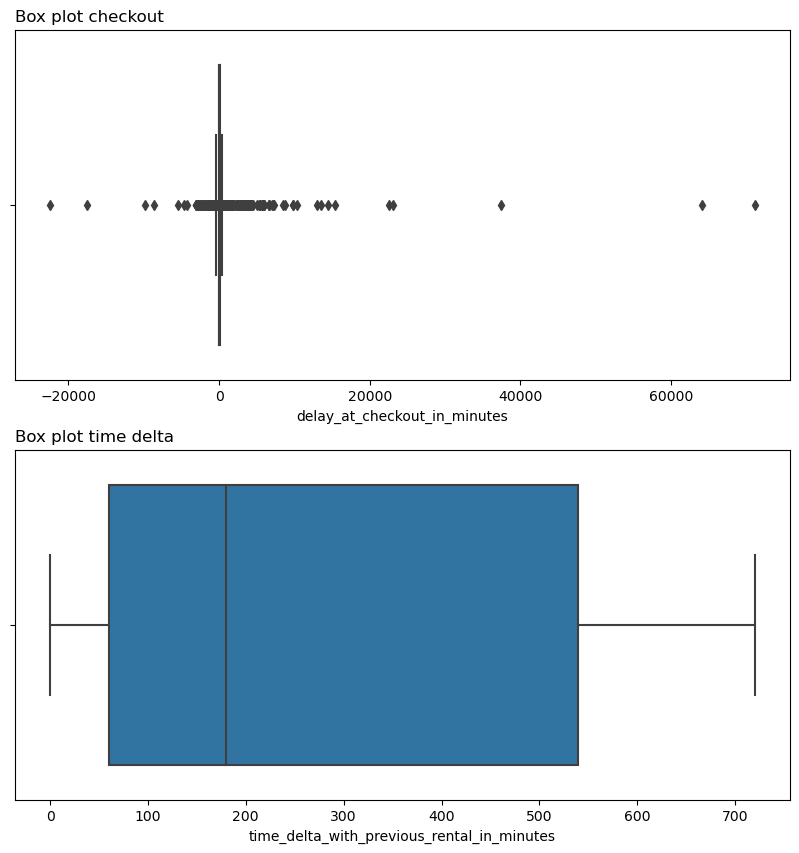

In [15]:
# Initialize a figure with 2 sub-graphs on 2 line
fig, axes = plt.subplots(nrows=2, figsize=(10, 10))

# Create a boxplot for each axis
sns.boxplot(x= 'delay_at_checkout_in_minutes', data = df_delay, ax=axes[0], whis = 3, fliersize = 5)
sns.boxplot(x= 'time_delta_with_previous_rental_in_minutes', data = df_delay, ax=axes[1], whis = 3, fliersize = 5)

# Add titles for each subgraph
axes[0].set_title("Box plot checkout", loc = 'left')
axes[1].set_title("Box plot time delta", loc = 'left')

Only the 'delay_at_checkout_in_minutes' column has outliers and underliers. However, the distribution of the data seems to show that it will be difficult to manage them with the usual techniques (z-score or IQR method). A more in-depth analysis of this distribution of data for manage outliers/underliers seems more adequate.

## Preprocessing with pandas

In [16]:
df_delay.state.value_counts()

ended       18045
canceled     3265
Name: state, dtype: int64

In [17]:
col_ = 'delay_at_checkout_in_minutes'
mask1 = df_delay[col_ ] <= df_delay[col_].quantile(0.01)
mask2 = df_delay[col_ ] >= df_delay[col_ ].quantile(0.98)
print('Taking central 97% data\n')
df_delay= df_delay.loc[~ (mask1 | mask2),:]

print('Done\n')
print('\nShape of new dataset:', df_delay.shape)
print('\nShape of previous dataset:', df_copy_eda.shape)
print('\nAmount of rows trimmed from first dataset: ', df_copy_eda.shape[0] - df_delay.shape[0])

Taking central 97% data

Done


Shape of new dataset: (20817, 7)

Shape of previous dataset: (21310, 7)

Amount of rows trimmed from first dataset:  493


In [18]:
print(f'Linterval de retard est désormais situé entre {df_delay.delay_at_checkout_in_minutes.describe()[3]} et {df_delay.delay_at_checkout_in_minutes.describe()[7]} minutes')

Linterval de retard est désormais situé entre -852.0 et 1000.0 minutes


In [19]:
# display the shape of dataframe
df_delay.describe(include = "all")

rental_id        car_id checkin_type  state  \
count    20817.000000   20817.00000        20817  20817   
unique            NaN           NaN            2      2   
top               NaN           NaN       mobile  ended   
freq              NaN           NaN        16559  17553   
mean    549719.743575  350059.13537          NaN    NaN   
std      13875.458514   58142.15849          NaN    NaN   
min     504806.000000  159250.00000          NaN    NaN   
25%     540633.000000  317639.00000          NaN    NaN   
50%     550357.000000  368724.00000          NaN    NaN   
75%     560467.000000  394875.00000          NaN    NaN   
max     576401.000000  417675.00000          NaN    NaN   

        delay_at_checkout_in_minutes  previous_ended_rental_id  \
count                   15853.000000               1795.000000   
unique                           NaN                       NaN   
top                              NaN                       NaN   
freq                             NaN                       NaN   
mean                       19.327951             550117.824513   
std                       176.629992              13230.393958   
min                      -852.000000             505628.000000   
25%                       -36.000000             540836.500000   
50%                         9.000000             550592.000000   
75%                        62.000000             560843.500000   
max                      1000.000000             575053.000000   

        time_delta_with_previous_rental_in_minutes  
count                                  1795.000000  
unique                                         NaN  
top                                            NaN  
freq                                           NaN  
mean                                    279.125348  
std                                     254.003975  
min                                       0.000000  
25%                                      60.000000  
50%                                     180.000000  
75%                                     540.000000  
max                                     720.000000

The outliers has been eliminated

In [20]:
df_delay.state.value_counts()

ended       17553
canceled     3264
Name: state, dtype: int64

By taking an interval of [-1000, 1000] all canceled values ​​have been removed. It is very surprising that people have been able to wait almost 1000 minutes without cancelling. Let's go further in the analysis

In [21]:
# Filtrer les données avec les masques
mask_a = df_delay['delay_at_checkout_in_minutes'] > 0.0
mask_b = df_delay['delay_at_checkout_in_minutes'] < 1000.0
filtered_data = df_delay.loc[mask_a & mask_b, :]

# Tracer la distribution des délais avec Plotly Express
fig = px.histogram(filtered_data, x='delay_at_checkout_in_minutes', nbins=30, histnorm = 'percent',
                   title = 'Graph representing the delay at checkout of rentals that have ended')

# Afficher le graphique
fig.show()


The fact that many rentals returned late have the status ended is due to the fact that a lot of rentals have a time_delta 'NAN', i.e. greater than 12 hours delay

In [22]:
time_delta_miss = df_delay['time_delta_with_previous_rental_in_minutes'].isna().sum() / len(df_delay)
time_delta_miss

0.9137723975596868

91% of the delays between two rentals are greater than 12 hours, which explains the graph above

In [23]:
# Columns % missing values
missing_percentages = (df_delay.isnull().sum() / df_delay.shape[0] * 100).sort_values(ascending = False)
print(missing_percentages )


previous_ended_rental_id                      91.377240
time_delta_with_previous_rental_in_minutes    91.377240
delay_at_checkout_in_minutes                  23.845895
rental_id                                      0.000000
car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
dtype: float64


We don't have informations about the NaN values of "delay_at_checkout_in_minutes" column, so we will assume that the NaN corresponds to a time delta of 0 minutes, therefore no retard.

It would be better to get closer to the people who collected the data to get more information.

In [24]:
# Replace the NaN values 'delay_at_checkout_in_minutes' by 0 
df_delay['delay_at_checkout_in_minutes'] = df_delay['delay_at_checkout_in_minutes'].fillna(0)

In [25]:
df_delay.head()

rental_id  car_id checkin_type     state  delay_at_checkout_in_minutes  \
0     505000  363965       mobile  canceled                           0.0   
1     507750  269550       mobile     ended                         -81.0   
2     508131  359049      connect     ended                          70.0   
3     508865  299063      connect  canceled                           0.0   
4     511440  313932       mobile     ended                           0.0   

   previous_ended_rental_id  time_delta_with_previous_rental_in_minutes  
0                       NaN                                         NaN  
1                       NaN                                         NaN  
2                       NaN                                         NaN  
3                       NaN                                         NaN  
4                       NaN                                         NaN

In [26]:
# Create a boolean column ('problematic_delay') Which indicates the insufficient delays between two renters
mask = df_delay['time_delta_with_previous_rental_in_minutes'] > df_delay['delay_at_checkout_in_minutes']
df_delay['problematic_delay'] = mask

In [27]:
# Display the dataframe
df_delay.head()

rental_id  car_id checkin_type     state  delay_at_checkout_in_minutes  \
0     505000  363965       mobile  canceled                           0.0   
1     507750  269550       mobile     ended                         -81.0   
2     508131  359049      connect     ended                          70.0   
3     508865  299063      connect  canceled                           0.0   
4     511440  313932       mobile     ended                           0.0   

   previous_ended_rental_id  time_delta_with_previous_rental_in_minutes  \
0                       NaN                                         NaN   
1                       NaN                                         NaN   
2                       NaN                                         NaN   
3                       NaN                                         NaN   
4                       NaN                                         NaN   

   problematic_delay  
0              False  
1              False  
2              False  
3              False  
4              False

In [28]:
# Drop unusefull columns
df_delay = df_delay.drop(["rental_id", "car_id"], axis = 1)
df_delay.columns

Index(['checkin_type', 'state', 'delay_at_checkout_in_minutes',
       'previous_ended_rental_id',
       'time_delta_with_previous_rental_in_minutes', 'problematic_delay'],
      dtype='object')

In [29]:
# Create new colmun 'retard'
df_delay.head()

checkin_type     state  delay_at_checkout_in_minutes  \
0       mobile  canceled                           0.0   
1       mobile     ended                         -81.0   
2      connect     ended                          70.0   
3      connect  canceled                           0.0   
4       mobile     ended                           0.0   

   previous_ended_rental_id  time_delta_with_previous_rental_in_minutes  \
0                       NaN                                         NaN   
1                       NaN                                         NaN   
2                       NaN                                         NaN   
3                       NaN                                         NaN   
4                       NaN                                         NaN   

   problematic_delay  
0              False  
1              False  
2              False  
3              False  
4              False

In [30]:
# Create a function to map column values
def map_delay(value):
    if value <= 0:
        return 'on time'
    elif value < 10 : 
        return '1 ≤ Delay < 10 mins'
    elif value < 60 :
        return '10 ≤ Delay < 60 mins'
    elif value >= 60 :
        return 'Delay ≥ 60'

# Apply the function to the "delay_at_check_out_in_minutes" column to create a new "status" column
df_delay["checkout_status"] = df_delay["delay_at_checkout_in_minutes"].apply(map_delay)

In [31]:
# Description data distribution
df_delay.checkout_status.value_counts()

on time                 11740
Delay ≥ 60               4101
10 ≤ Delay < 60 mins     3685
1 ≤ Delay < 10 mins      1291
Name: checkout_status, dtype: int64

In [32]:
fig = px.histogram(df_delay, x='checkout_status', color='checkin_type', histnorm='percent',
                   title='Distribution de checkout_status', height=350)
fig.show()

## Observe the correlation between column and target

In [33]:
# Create a copy of df_delay
df_delay_copy = df_delay.copy()

In [34]:
df_delay_copy.head()

checkin_type     state  delay_at_checkout_in_minutes  \
0       mobile  canceled                           0.0   
1       mobile     ended                         -81.0   
2      connect     ended                          70.0   
3      connect  canceled                           0.0   
4       mobile     ended                           0.0   

   previous_ended_rental_id  time_delta_with_previous_rental_in_minutes  \
0                       NaN                                         NaN   
1                       NaN                                         NaN   
2                       NaN                                         NaN   
3                       NaN                                         NaN   
4                       NaN                                         NaN   

   problematic_delay checkout_status  
0              False         on time  
1              False         on time  
2              False      Delay ≥ 60  
3              False         on time  
4              False         on time

We will not use the ID column

In [35]:
# Encoding categorical values
df_delay_copy_encoded = pd.get_dummies(df_delay_copy, columns = ['checkin_type', 'state', 'checkout_status', 'problematic_delay'], drop_first=True)
df_delay_copy_encoded

delay_at_checkout_in_minutes  previous_ended_rental_id  \
0                               0.0                       NaN   
1                             -81.0                       NaN   
2                              70.0                       NaN   
3                               0.0                       NaN   
4                               0.0                       NaN   
...                             ...                       ...   
21305                           0.0                  573429.0   
21306                        -337.0                       NaN   
21307                         144.0                       NaN   
21308                         -76.0                       NaN   
21309                          35.0                       NaN   

       time_delta_with_previous_rental_in_minutes  checkin_type_mobile  \
0                                             NaN                    1   
1                                             NaN                    1   
2                                             NaN                    0   
3                                             NaN                    0   
4                                             NaN                    1   
...                                           ...                  ...   
21305                                       300.0                    1   
21306                                         NaN                    1   
21307                                         NaN                    1   
21308                                         NaN                    0   
21309                                         NaN                    0   

       state_ended  checkout_status_10 ≤ Delay < 60 mins  \
0                0                                     0   
1                1                                     0   
2                1                                     0   
3                0                                     0   
4                1                                     0   
...            ...                                   ...   
21305            1                                     0   
21306            1                                     0   
21307            1                                     0   
21308            1                                     0   
21309            1                                     1   

       checkout_status_Delay ≥ 60  checkout_status_on time  \
0                               0                        1   
1                               0                        1   
2                               1                        0   
3                               0                        1   
4                               0                        1   
...                           ...                      ...   
21305                           0                        1   
21306                           0                        1   
21307                           1                        0   
21308                           0                        1   
21309                           0                        0   

       problematic_delay_True  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  
...                       ...  
21305                       1  
21306                       0  
21307                       0  
21308                       0  
21309                       0  

[20817 rows x 9 columns]

Text(0.5, 1.0, 'Correlation Matrix')

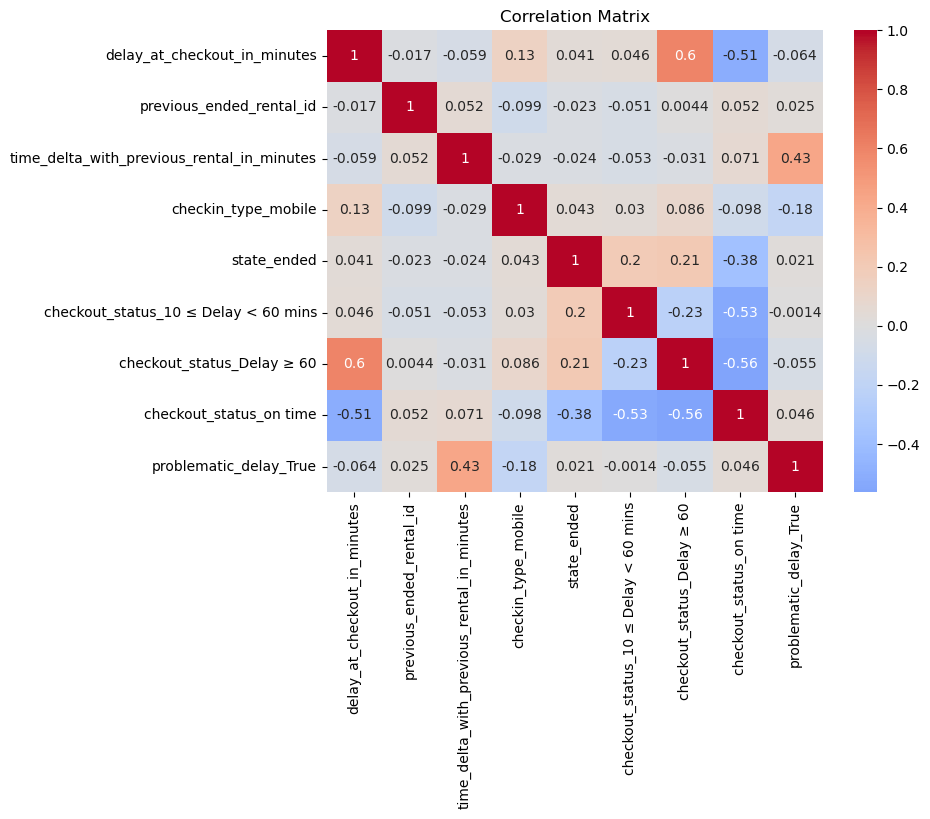

In [36]:
# Calculate corr matrix
corr_matrix = df_delay_copy_encoded.corr()

# Display the corr matrix with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')

No strong relationship is observed. High relationships mainly concern columns that have been built using information from other columns.

In [39]:
# Transform DataFrame to CSV
df_delay.to_csv(r'C:\\Users\\33760\\Desktop\\FULLSTACK\\FULLSTACK\\Projet\\BLOC 5\\Get around\\cake_app\\clean_file_delay.csv', index=False)

* ### Analysis of potential delays at checkout

In [ ]:
fig = px.histogram(df_delay, x ='checkout_status', title="Distribution of the delay (checkout_status)", color='checkout_status', text_auto=True)
fig.update_layout(bargap=0.2)
fig.show()


* ### Checkout delay analysis according to the checkin type

In [ ]:
fig = px.histogram(df_delay, x ='checkout_status', title="Number of retard at checkouts according to the checkin type", color='checkin_type', text_auto=True)
fig.update_layout(bargap=0.2)
fig.show()

* ### Problematic delay percentage


In [40]:
fig = px.pie(data_frame = df_delay, names = 'problematic_delay',
                   title = "Problematic delay in relative value")
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
mask = df_delay['state'] == 'canceled'
df_canceled = df_delay.loc[mask,:]

fig = px.pie(data_frame = df_canceled, names = 'checkin_type', title = 'Cancelation according to the checkin_type')
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
fig = px.pie(data_frame = df_delay, names = 'checkin_type', title = 'Répartion checkin type')
fig.show()

In [ ]:
fig = px.pie(data_frame = df_delay, names = 'problematic_delay', color = 'problematic_delay',
                   title = "Percentage of rentals with insufficient delay")
fig.update_layout(bargap=0.2)
fig.show()

* ### Number of problem cases in terms of delays (checkout vs time_delta) and how many of these rentals actually influence cancellations


In [ ]:
fig = px.histogram(df_delay, x = 'problematic_delay', color = 'state',
                   title = "Number of cancellations with insufficient delay")
fig.update_layout(bargap=0.2)
fig.show()
                

* ### Find the threshold

In [ ]:
fig = px.histogram(df_delay, x='state', color = 'checkout_status', facet_col= 'checkin_type')
fig.show() 

In [ ]:
fig = px.histogram(df_delay, x='checkout_status',color='state', facet_col= 'checkin_type')
fig.show()

# Report & Recommandations:

Only 7% of rentals are delayed which is relatively low.

We can notice that most of the delays concern significant delays, ie more than one hour. It would be wise to offer a discount to customers in case of punctuality to encourage them to be on time.

The connect checkin_type represents only 20% of rentals, but more than 24% of cancellations. Perhaps not having to meet the next tenant in person to hand over the keys makes you less punctual.

It is interesting to note that out of all the problematic delays (checkout vs time delta) only 194 lead to a cancellation, ie less than 1%.

It is surprising that all rental cancellations occur when the delivery of the vehicle was done on time. The people who created the dataset should be interviewed for more information about how the data was collected. (This finding may also be due to the fact that I took the decision to set the nan values ​​of the delay_at_checkout_in_minutes to 0)

According to this data, it is not necessary to set a maximum period between rentals in order to minimise cancellations and turnover loss.